In [1]:
import pandas as pd
# Notebook to test the animation of the plot
# go to the root of the project
# we are using autoreload extension, in charge to reload all the imported package/modules
# without the need to restart the kernel

%load_ext autoreload
%autoreload 2
%matplotlib inline


def set_paths() -> None:
    """
    set correct working directory and python path when started from within PyCharm
    """

    import sys
    import os

    # only change the directory if we have not yet done so
    if "cwd" not in globals():
        # noinspection PyGlobalUndefined
        global cwd
        cwd = os.getcwd()
        os.chdir(cwd)
        # append the source directory
        sys.path.append("../src/")

    print(f"working dir is '{os.getcwd()}'")

set_paths()

working dir is '/Users/benkiranekamil/Desktop/Projects/Mindfuel/Self Driving Cars/bcg-NN-genetic-cars/notebooks'


 --- Generation 0 :  71.83010770285439
Number of surviving cars: 0
Number of Timesteps before all cars are out or T_max is reached: 92
max fitness = 460.0
 --- Generation 1 :  110.97949787684344
Number of surviving cars: 0
Number of Timesteps before all cars are out or T_max is reached: 196
max fitness = 990.0
 --- Generation 2 :  307.44882346372526
Number of surviving cars: 0
Number of Timesteps before all cars are out or T_max is reached: 200
max fitness = 990.0
 --- Generation 3 :  608.9817691270918
Number of surviving cars: 0
Number of Timesteps before all cars are out or T_max is reached: 200
max fitness = 990.0
 --- Generation 4 :  588.6792398117689
Number of surviving cars: 0
Number of Timesteps before all cars are out or T_max is reached: 200
max fitness = 990.0
 --- Generation 5 :  692.4049658300656
Number of surviving cars: 1
Number of Timesteps before all cars are out or T_max is reached: 200
max fitness = 990.0
 --- Generation 6 :  668.1056515133407
Number of surviving cars

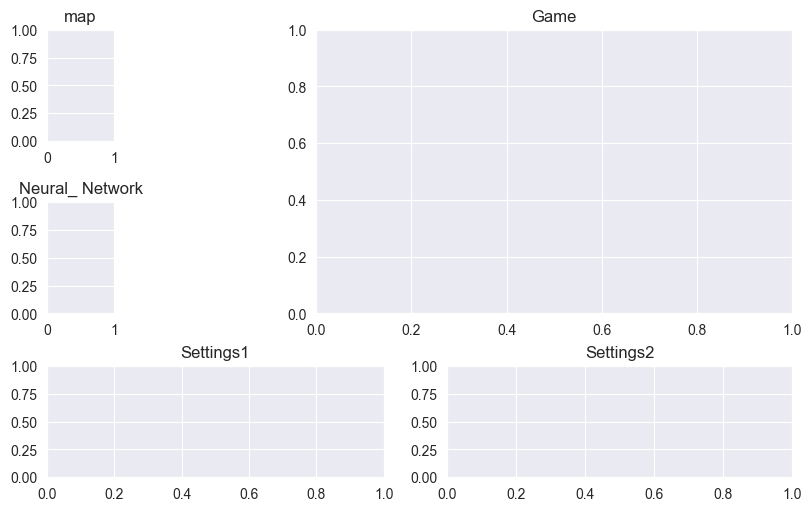

In [2]:
from driving.environment import Environment
import numpy as np

env = Environment(nb_cars=50)
dict_pos = {}
G = 0
for car in env.cars:
    car.move_car(np.random.rand() * 2 - 1)
dict_pos[G] = env.NN_sim_until_out_noplot_norprint()
nb_gen = 10

for idx_gen in range(nb_gen):
    max_car = {"idx": 0, "fitness": 0}
    for i, car in enumerate(env.cars):
        car_fit = {"idx": i, "fitness": car.fitness(env.route)}
        if car_fit["fitness"] > max_car["fitness"]:
            max_car = car_fit
    # env.cars[max_car["idx"]].plot_pos()
    # plt.plot(*env.route.polygon.exterior.xy)
    # plt.axis("equal")
    # plt.show()
    print(" --- Generation {} : ".format(idx_gen), np.mean(env.fitnesses()))
    nb_surviving_cars = np.sum([car["alive"] for i, car in dict_pos[G][max(dict_pos[G].keys())].items()])
    print(f"Number of surviving cars: {nb_surviving_cars}")
    print(f"Number of Timesteps before all cars are out or T_max is reached: {max(dict_pos[G].keys())}")
    print('max fitness = {}'.format(max(env.fitnesses())))

    G+=1
    env.make_new_gen(10, nb_mut=1)
    for car in env.cars:
        car.move_car(np.random.rand() * 2 - 1)
    dict_pos[G] = env.NN_sim_until_out_noplot_norprint()


In [3]:
columns = ["Generation", "T", "car", "x", "y", "alive"]
dict_pos_df = {
    "Generation": [],
    "T": [],
    "car": [],
    "x": [],
    "y": [],
    "alive": []
}

for gen in dict_pos.keys():
    for T in dict_pos[gen].keys():
        for car in dict_pos[gen][T].keys():
            dict_pos_df["Generation"].append(gen)
            dict_pos_df["T"].append(T)
            dict_pos_df["car"].append(car)
            x, y = dict_pos[gen][T][car]['position']
            dict_pos_df["x"].append(x[0] if type(x) == np.ndarray else x)
            dict_pos_df["y"].append(y[0] if type(y) == np.ndarray else y)
            dict_pos_df["alive"].append(dict_pos[gen][T][car]["alive"])

df = pd.DataFrame.from_dict(dict_pos_df)

<AxesSubplot:xlabel='x', ylabel='y'>

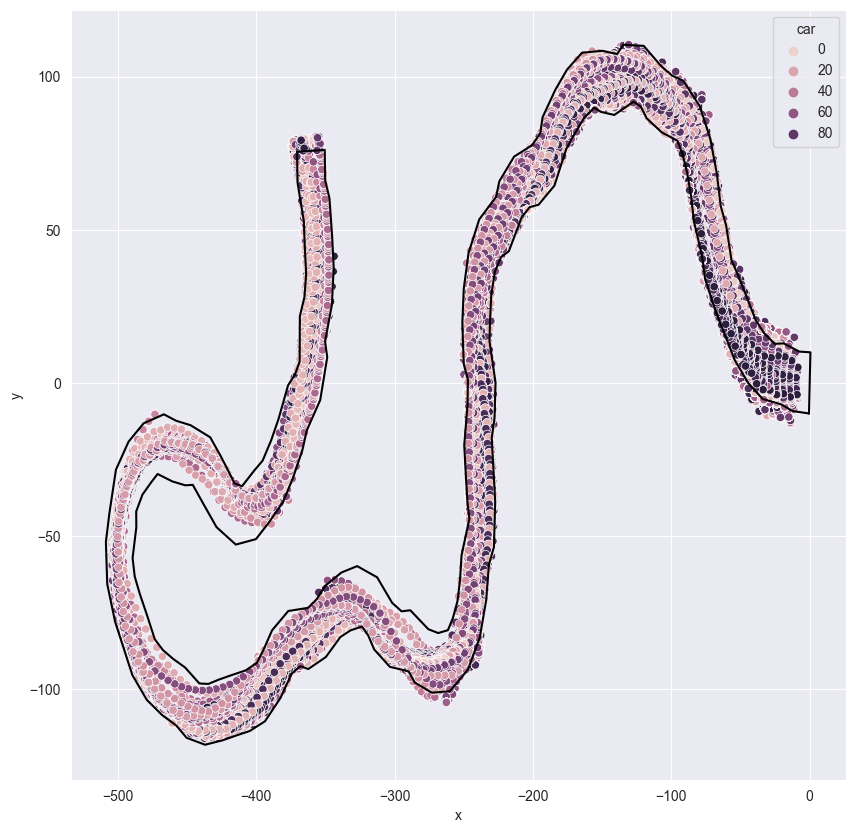

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(*env.route.polygon.exterior.xy, color='black')
sns.scatterplot(data=df, x="x", y="y", hue="car", ax=ax)

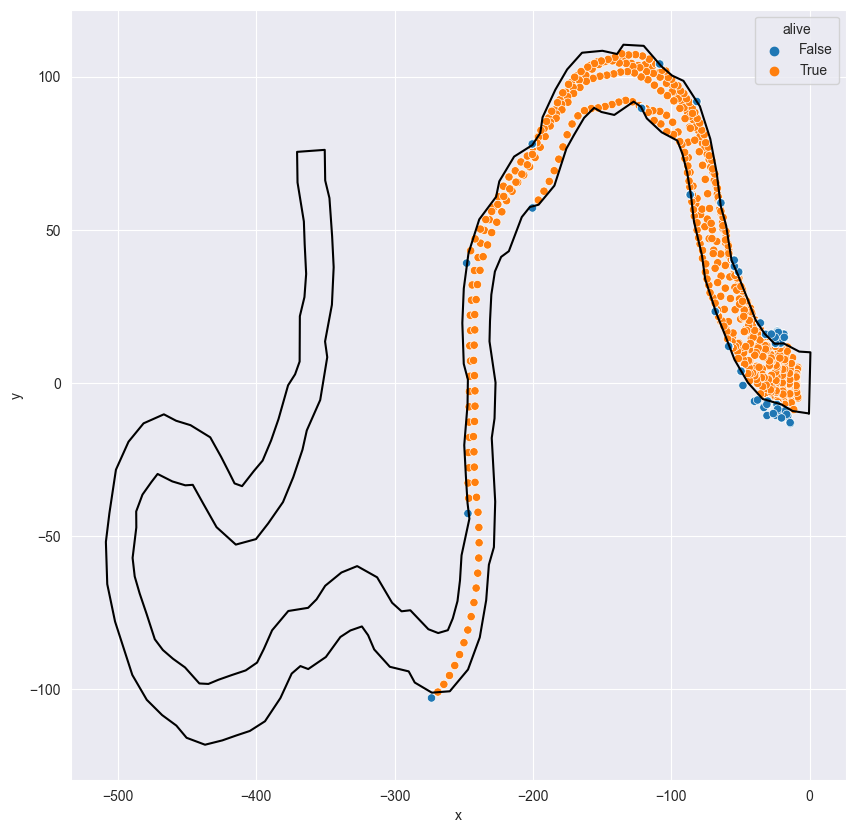

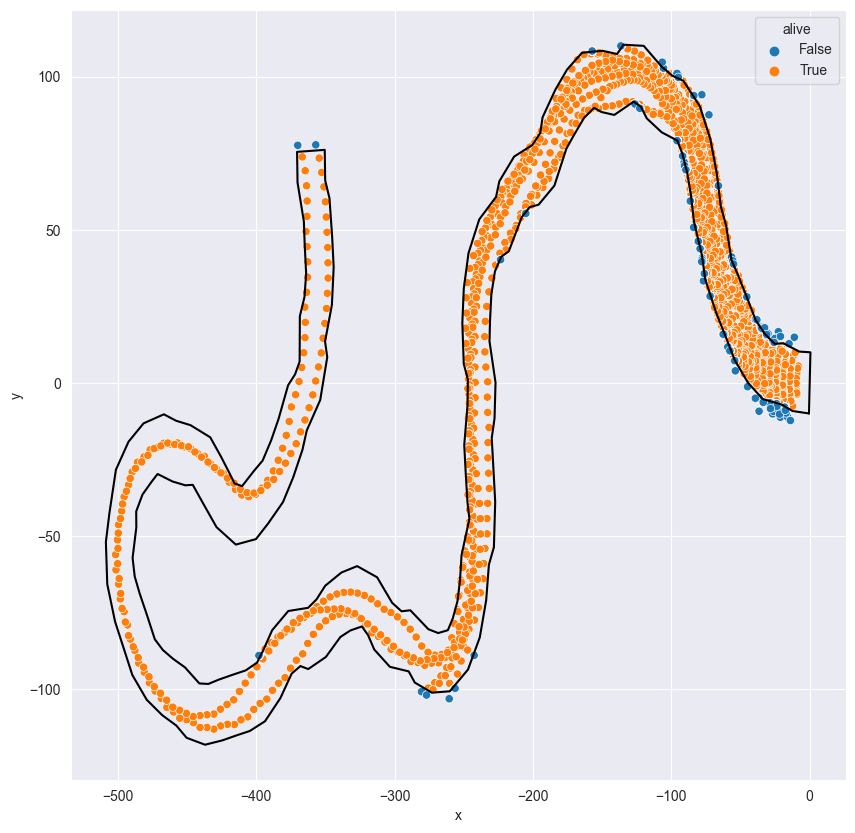

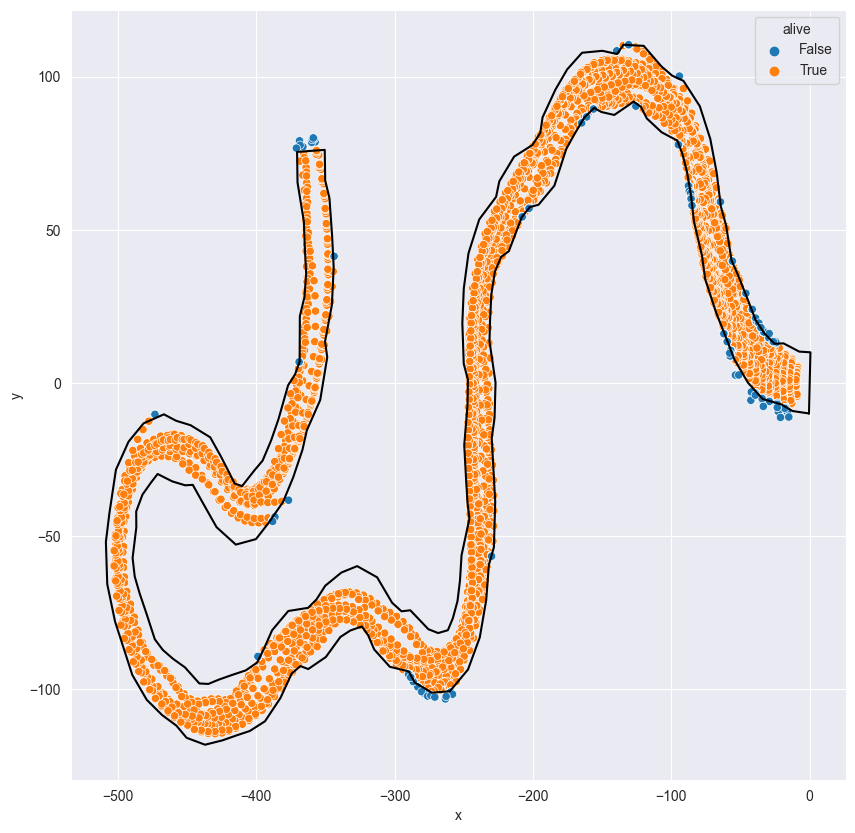

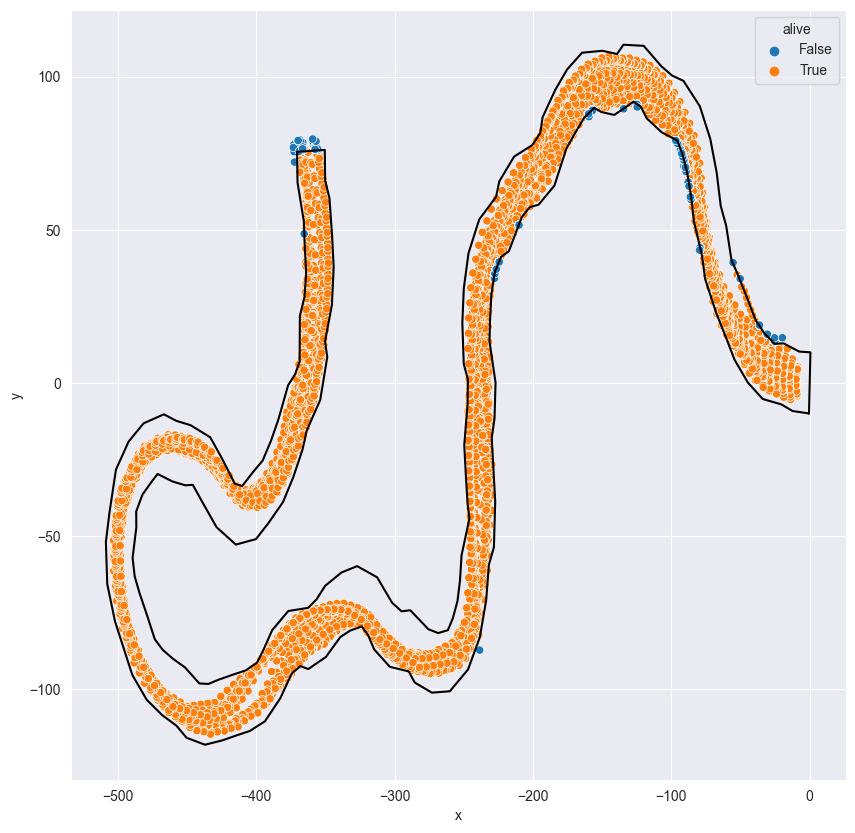

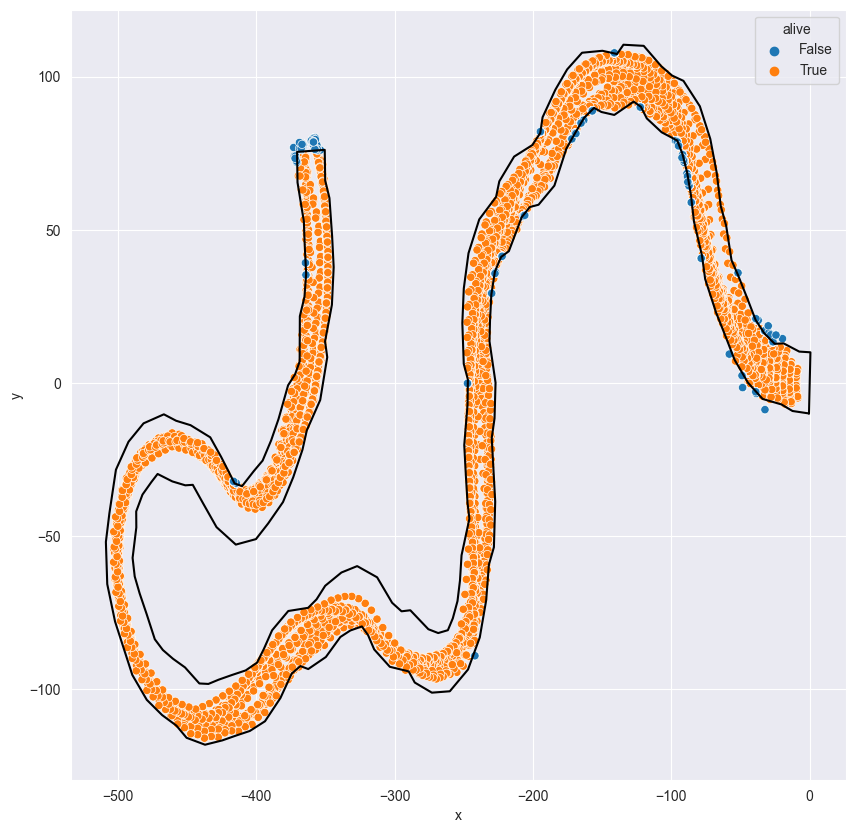

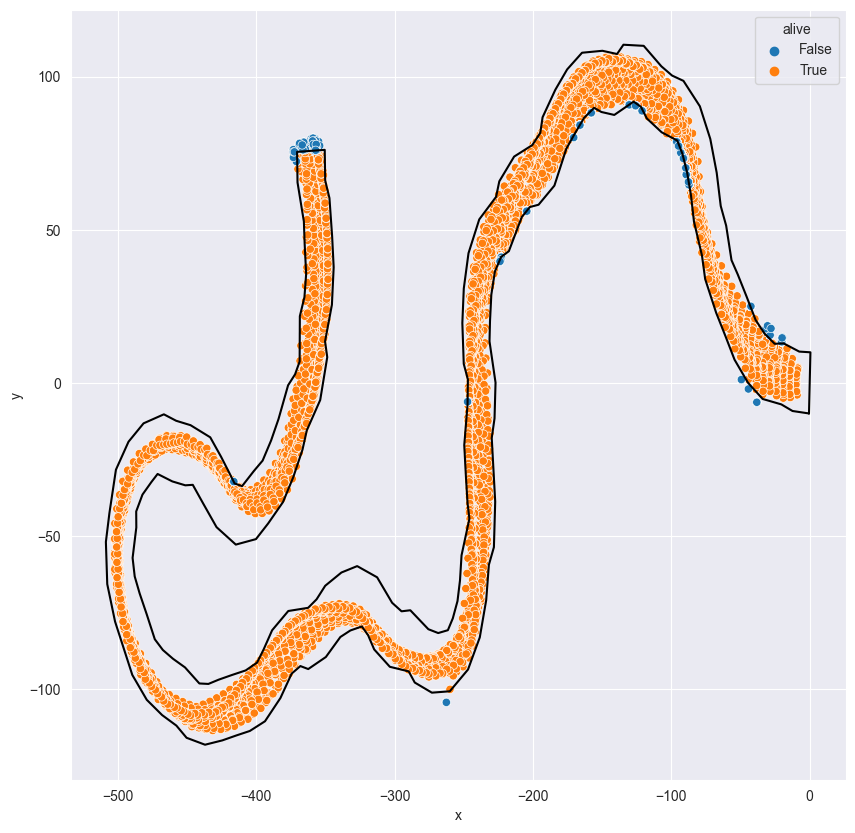

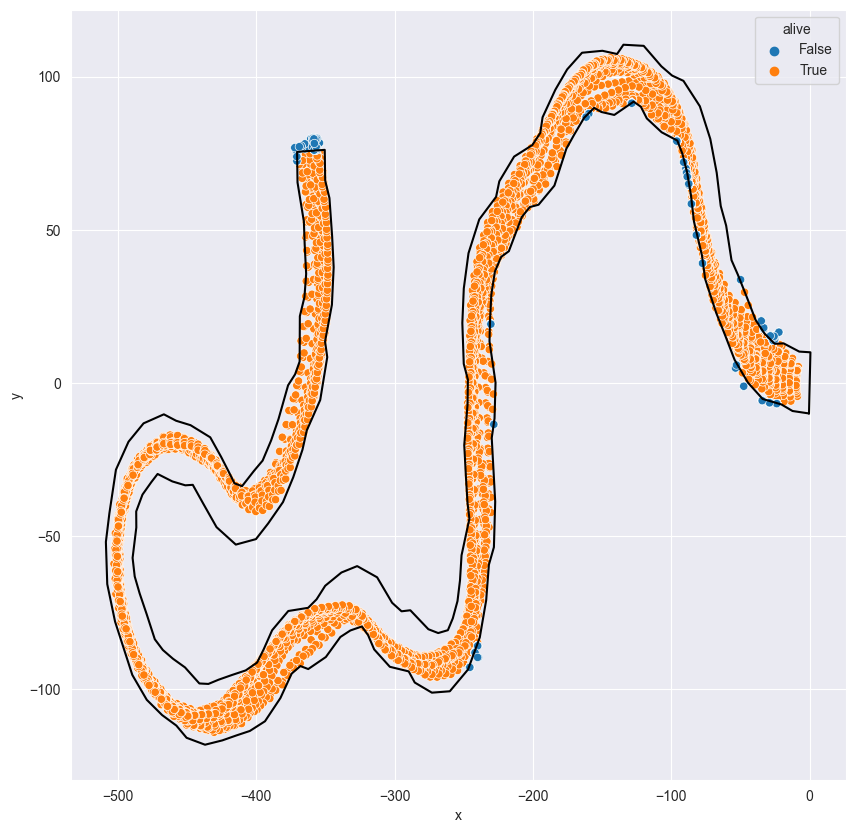

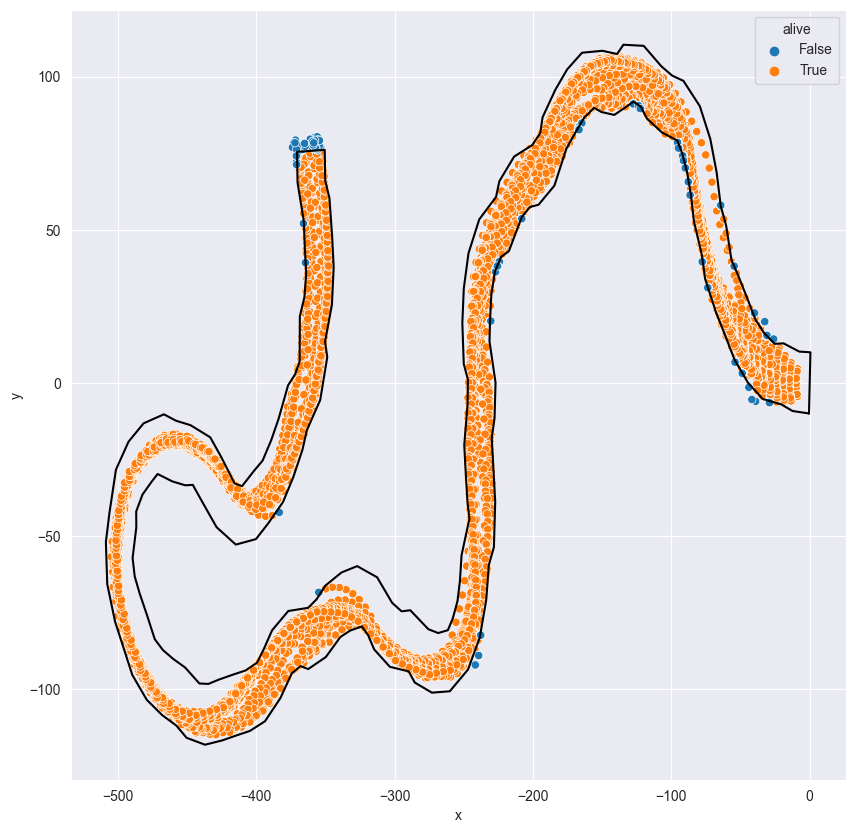

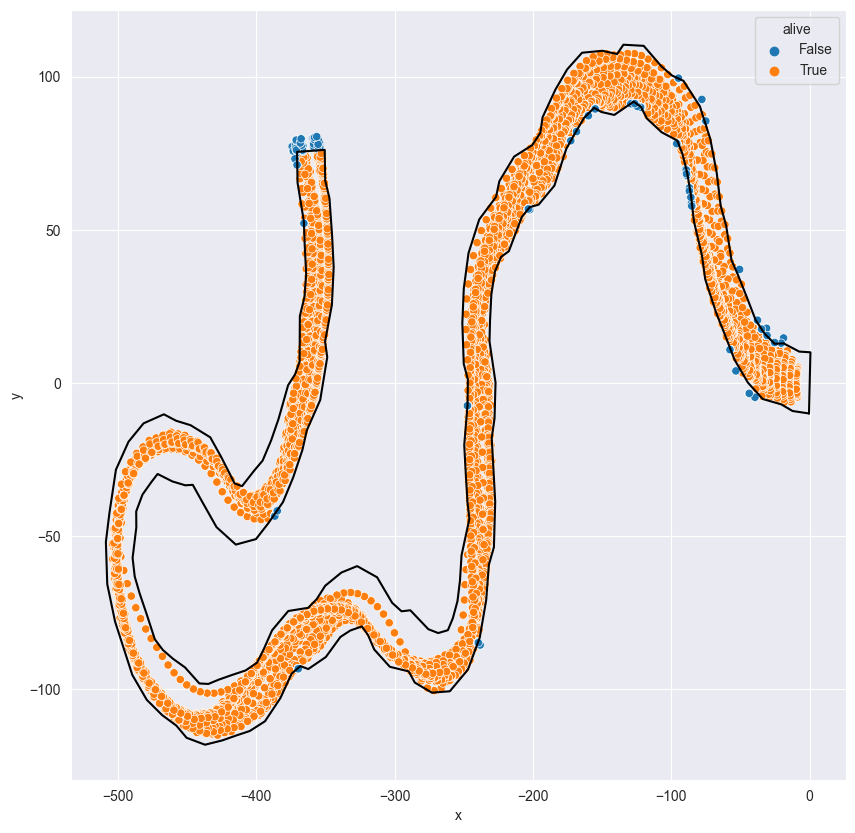

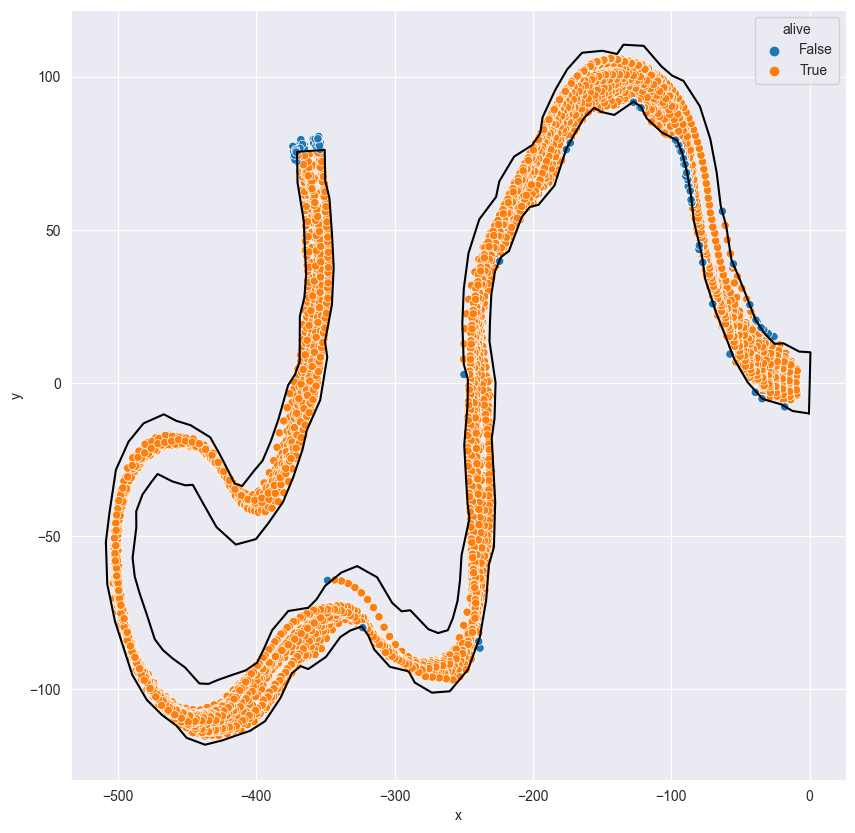

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
for g in range( 10):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(*env.route.polygon.exterior.xy, color='black')
    sns.scatterplot(data=df[df["Generation"]==g],
                    x="x", y="y", hue="alive", ax=ax)


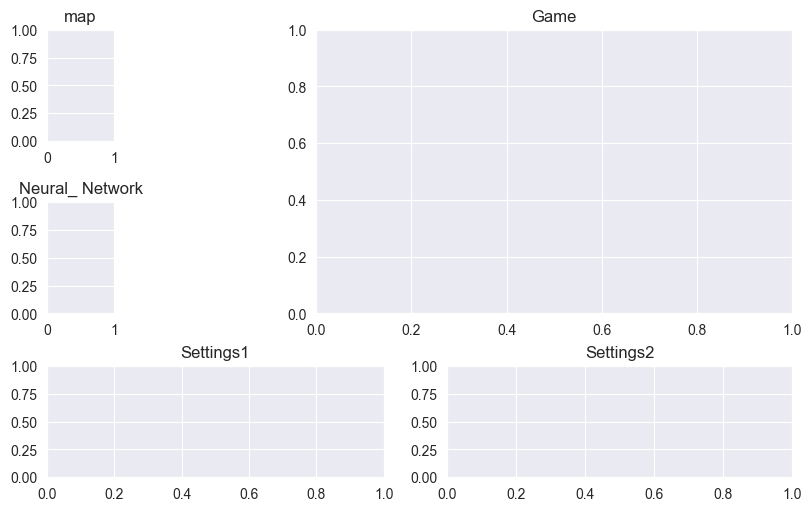

In [17]:
env2 = Environment(nb_cars=100)

In [26]:
import copy

env2.cars = copy.deepcopy(env.cars)

# Initialize cars position
for car in env2.cars:
    car.pos = (0,0)
    car.move_car(np.random.rand() * 2 - 1)
    car.theta = env2.route.initial_theta
G2=0
dict_pos_new_route = {}
dict_pos_new_route[G2] = env2.NN_sim_until_out_noplot_norprint()

In [27]:
columns = ["Generation", "T", "car", "x", "y", "alive"]
dict_pos_df_2 = {
    "Generation": [],
    "T": [],
    "car": [],
    "x": [],
    "y": [],
    "alive": []
}

for gen in dict_pos_new_route.keys():
    for T in dict_pos_new_route[gen].keys():
        for car in dict_pos_new_route[gen][T].keys():
            dict_pos_df_2["Generation"].append(gen)
            dict_pos_df_2["T"].append(T)
            dict_pos_df_2["car"].append(car)
            x, y = dict_pos_new_route[gen][T][car]['position']
            dict_pos_df_2["x"].append(x[0] if type(x) == np.ndarray else x)
            dict_pos_df_2["y"].append(y[0] if type(y) == np.ndarray else y)
            dict_pos_df_2["alive"].append(dict_pos_new_route[gen][T][car]["alive"])

df2 = pd.DataFrame.from_dict(dict_pos_df_2)

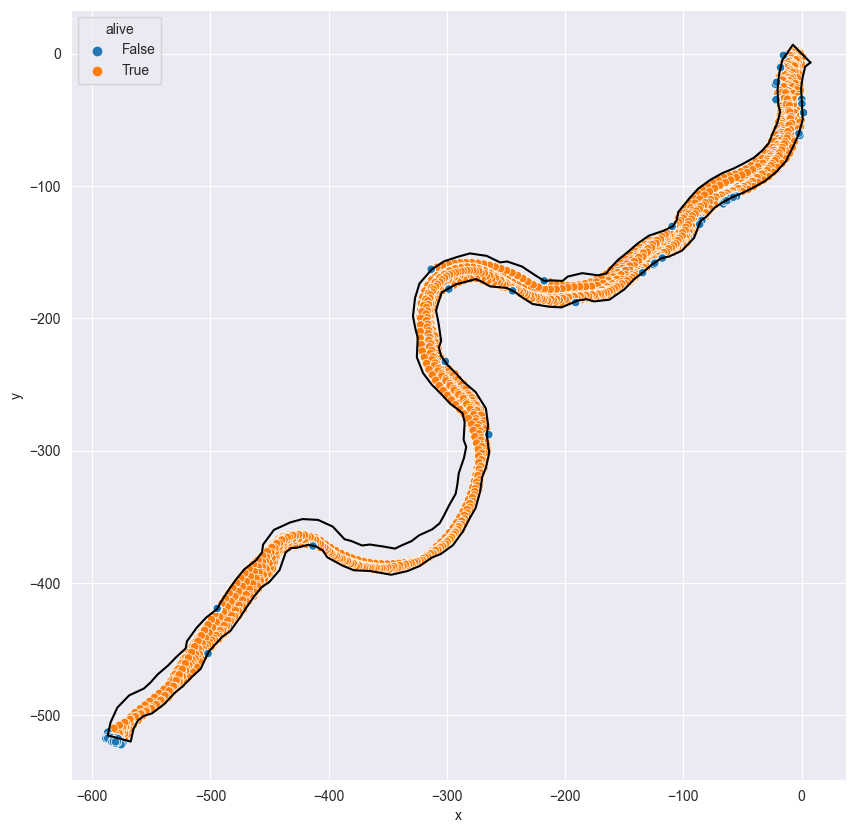

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
for g in range(df2.Generation.max()+1):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(*env2.route.polygon.exterior.xy, color='black')
    sns.scatterplot(data=df2[df2["Generation"]==g],
                    x="x", y="y", hue="alive", ax=ax)


In [37]:
df.to_csv(
    f"../data/positions_10_gens_training_initial_route.csv",
    sep=";",
)

df2.to_csv(
    f"../data/positions_1_gen_testing_new_route.csv",
    sep=";",
)

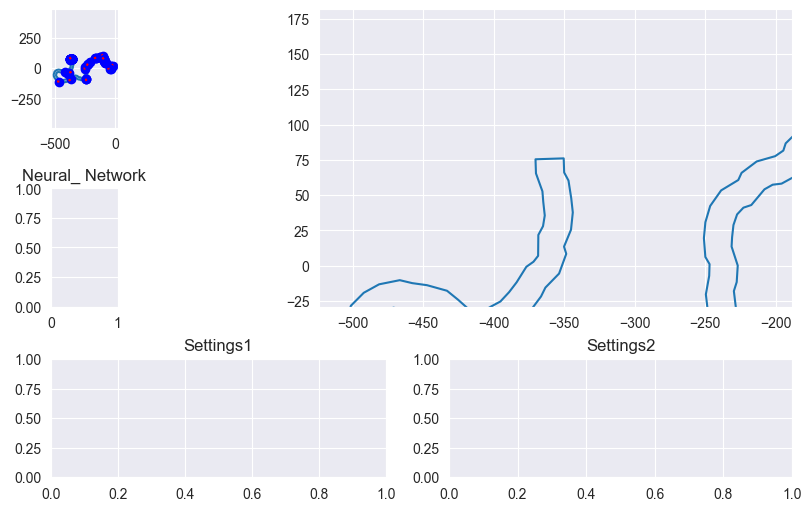

In [34]:
env.UI

<AxesSubplot:xlabel='x', ylabel='y'>

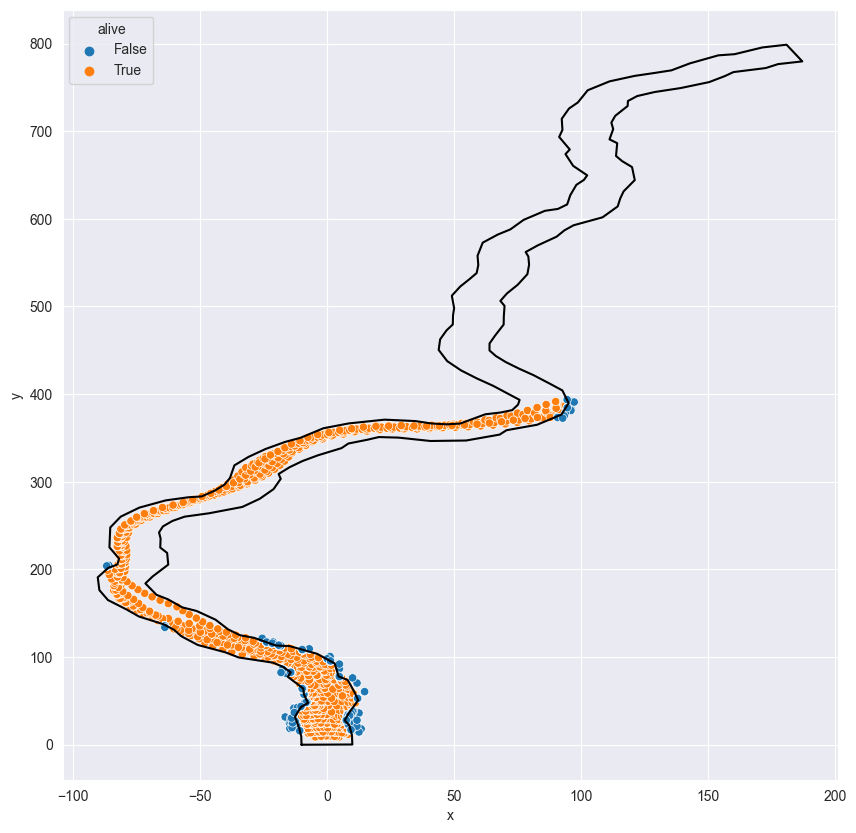

In [8]:
G+=1
env.make_new_gen(10, nb_mut=1)
for car in env.cars:
    car.move_car(np.random.rand() * 2 - 1)
dict_pos[G] = env.NN_sim_until_out_noplot_norprint()

columns = ["Generation", "T", "car", "x", "y", "alive"]
dict_pos_df = {
    "Generation": [],
    "T": [],
    "car": [],
    "x": [],
    "y": [],
    "alive": []
}

for gen in dict_pos.keys():
    for T in dict_pos[gen].keys():
        for car in dict_pos[gen][T].keys():
            dict_pos_df["Generation"].append(gen)
            dict_pos_df["T"].append(T)
            dict_pos_df["car"].append(car)
            x, y = dict_pos[gen][T][car]['position']
            dict_pos_df["x"].append(x[0] if type(x) == np.ndarray else x)
            dict_pos_df["y"].append(y[0] if type(y) == np.ndarray else y)
            dict_pos_df["alive"].append(dict_pos[gen][T][car]["alive"])

df = pd.DataFrame.from_dict(dict_pos_df)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(*env.route.polygon.exterior.xy, color='black')
sns.scatterplot(data=df[df["Generation"]==1],
                x="x", y="y", hue="alive", ax=ax)

<AxesSubplot:xlabel='x', ylabel='y'>

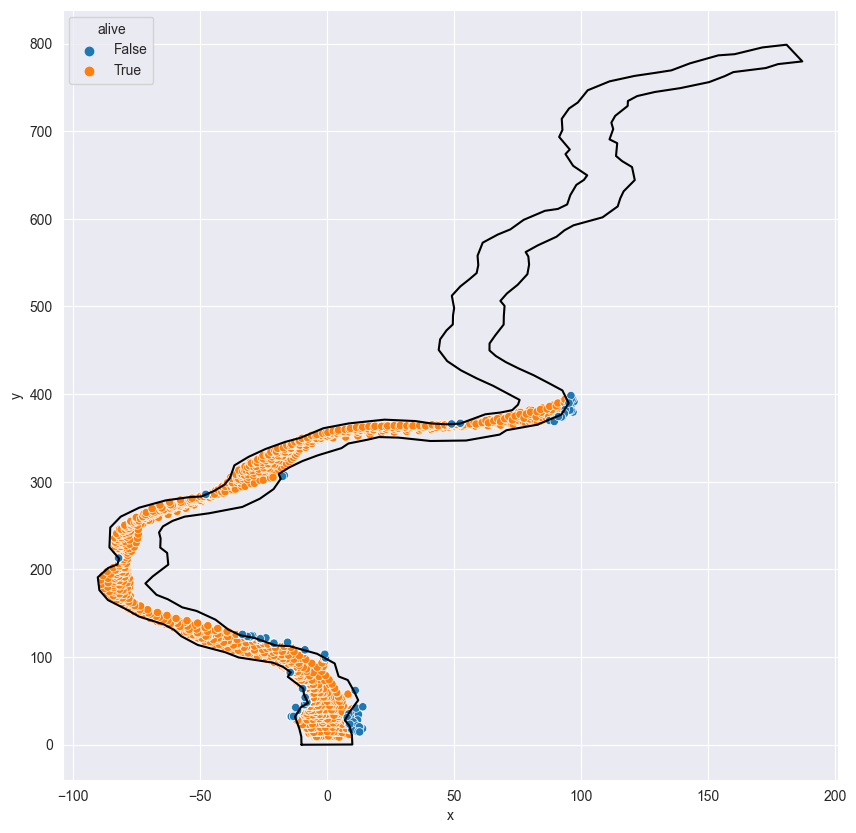

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(*env.route.polygon.exterior.xy, color='black')
sns.scatterplot(data=df[df["Generation"]==2],
                x="x", y="y", hue="alive", ax=ax)

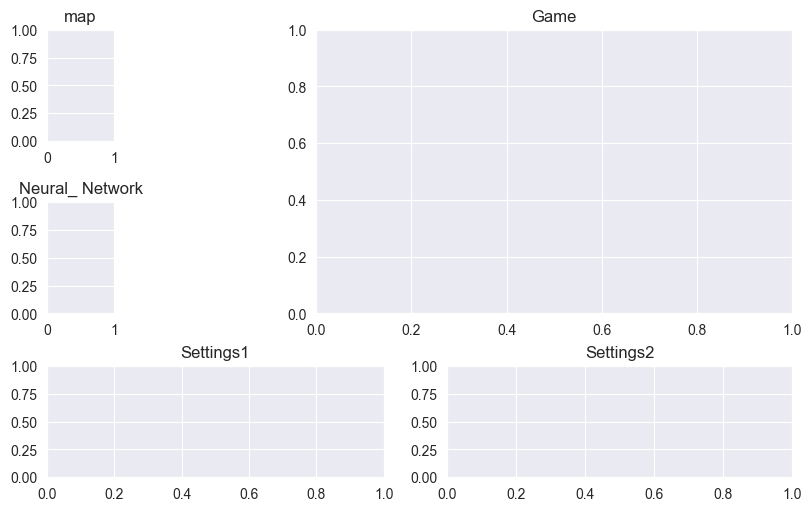

In [2]:
from driving.environment import Environment
import numpy as np

env = Environment(nb_cars=50)

In [3]:
env.cars[35].__dict__

{'pos': (0, 0),
 'theta': 5.284979744102002,
 'point': <shapely.geometry.point.Point at 0x7f9b2a047490>,
 'speed': 5,
 'R': 20,
 'arrow_end': (10.836228035490933, -16.810001843035003),
 'angles_list': [1.5707963267948966,
  0.7853981633974483,
  0,
  -0.7853981633974483,
  -1.5707963267948966],
 'antennas_endpoint': [(168.10001843035005, 108.36228035490933),
  (195.48836621347834, -42.24095968588995),
  (108.36228035490933, -168.10001843035005),
  (-42.24095968588993, -195.48836621347834),
  (-168.10001843035005, -108.36228035490936)],
 'antennas_lines': [<shapely.geometry.linestring.LineString at 0x7f9b2a047550>,
 'model': car_nn(
   (lin1): Linear(in_features=5, out_features=3, bias=True)
   (lin2): Linear(in_features=3, out_features=1, bias=True)
 )}

In [16]:
df[df["Generation"]==1]

Generation    T  car          x          y  alive
6000            1    0    0  -1.909068   0.519804   True
6001            1    0    1  -1.963217  -0.052942   True
6002            1    0    2  -1.943929  -0.385457   True
6003            1    0    3  -1.899438   0.625071   True
6004            1    0    4  -1.948376   0.329900   True
...           ...  ...  ...        ...        ...    ...
26095           1  200   95 -16.240173  11.523458  False
26096           1  200   96 -23.729105  -7.941305  False
26097           1  200   97 -14.254048  10.946609  False
26098           1  200   98 -13.646667  10.994338  False
26099           1  200   99 -40.965542  12.295086  False

[20100 rows x 6 columns]

In [ ]:
()
for idx_gen in range(nb_gen):
    print(G)
    G += 1
    env.make_new_gen(10, nb_mut=1)
    for car in env.cars:
        car.move_car(np.random.rand() * 2 - 1)
    dict_pos[G] = env.NN_sim_until_out_noplot_norprint()

In [ ]:
pd.DataFrame.from_dict(dict_pos, orient='index')

In [ ]:
columns = ["Generation", "T", "car", "x", "y", "alive"]
dict_pos_df = {
    "Generation": [],
    "T": [],
    "car": [],
    "x": [],
    "y": [],
    "alive": []
}

for gen in dict_pos.keys():
    for T in dict_pos[gen].keys():
        for car in dict_pos[gen][T].keys():
            dict_pos_df["Generation"].append(gen)
            dict_pos_df["T"].append(T)
            dict_pos_df["car"].append(car)
            x, y = dict_pos[gen][T][car]['position']
            dict_pos_df["x"].append(x[0] if type(x) == np.ndarray else x)
            dict_pos_df["y"].append(y[0] if type(y) == np.ndarray else y)
            dict_pos_df["alive"].append(dict_pos[gen][T][car]["alive"])

df = pd.DataFrame.from_dict(dict_pos_df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(*env.route.polygon.exterior.xy, color='black')
sns.scatterplot(data=df, x="x", y="y", hue="alive", ax=ax)

In [8]:
import plotly.express as px

# Speed up the animation
fig = px.scatter(df[df["Generation"]==0],
                 x="x",
                 y="y",
                 color="alive",
                 hover_name="car",
                animation_frame="T",

                    range_x=[-1000, 200],
                    range_y=[-1000,200],


                 )
fig.update_layout(
    title="Evolution of the cars",
    xaxis_title="x",
    yaxis_title="y",
    legend_title="Alive",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

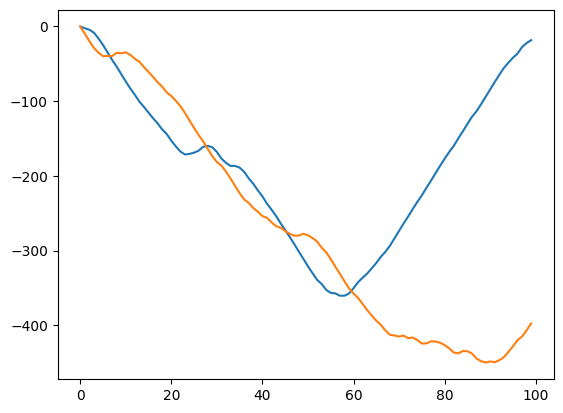

In [57]:
plt.plot(env.route.points)

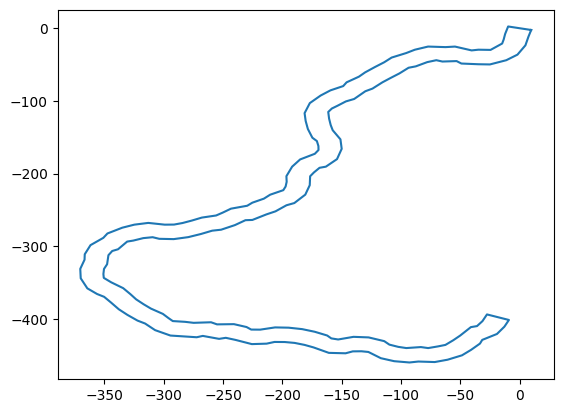

In [63]:
plt.plot(*env.route.polygon.exterior.xy)